In [63]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np
from sklearn.model_selection import train_test_split
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR, SVC
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn import preprocessing

data = pd.read_csv('https://raw.githubusercontent.com/RodriNico2206/Data-science-s-projects/refs/heads/master/Scholarship%20Prediction/erasmus.csv')

In [64]:
data.head()

,INDEX,COUNTRIES,UNIVERSITIES,FACULTIES,DEPARTMENTS,EXAM SCORE,GRANT
0,1,ITALIA,UNIVERSITA DEGLI STUDI DI ROMA LA SAPIENZA,FACULTY OF ARTS AND SCIENCES,ENGLISH LANGUAGE AND LITERATURE,98.50,1
1,2,ITALIA,ALMA MATER STUDIORUM - UNIVERSITA DI BOLOGNA,FACULTY OF ARTS AND SCIENCES,SOCIOLOGY,97.10,1
2,3,GERMAN,UNIVERSITAET BIELEFELD,FACULTY OF ARTS AND SCIENCES,PSYCHOLOGY,96.80,1
3,4,GERMAN,HOCHSCHULE FUR ANGEWANDTE WISSENSCHAFTEN HAMBURG,FACULTY OF HEALTH SCIENCES,NUTRITION AND DIETETICS,96.50,1
4,5,ITALIA,UNIVERSITA DEGLI STUDI DI ROMA LA SAPIENZA,FACULTY OF ARTS AND SCIENCES,ENGLISH LANGUAGE AND LITERATURE,96.32,1


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   INDEX         341 non-null    int64  
 1   COUNTRIES     341 non-null    object 
 2   UNIVERSITIES  341 non-null    object 
 3   FACULTIES     341 non-null    object 
 4   DEPARTMENTS   339 non-null    object 
 5   EXAM SCORE    341 non-null    float64
 6   GRANT         341 non-null    int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 18.8+ KB


In [66]:
data.describe()

,INDEX,EXAM SCORE,GRANT
count,341.000000,341.000000,341.000000
mean,171.000000,79.138944,0.434018
std,98.582453,8.565175,0.496356
min,1.000000,51.400000,0.000000
25%,86.000000,73.570000,0.000000
50%,171.000000,79.300000,0.000000
75%,256.000000,85.280000,1.000000
max,341.000000,98.500000,1.000000


In [67]:
#analyze na values on data frame
print('Na values per column\n', data.isna().sum())

#drop columns with na values
data.dropna(inplace= True)

Na values per column
 INDEX           0
COUNTRIES       0
UNIVERSITIES    0
FACULTIES       0
DEPARTMENTS     2
EXAM SCORE      0
GRANT           0
dtype: int64


In [68]:
#analyze duplicated rows
data.duplicated().sum()

#columns of data frame
print(data.columns)

Index(['INDEX', 'COUNTRIES', 'UNIVERSITIES', 'FACULTIES', 'DEPARTMENTS',
       'EXAM SCORE', 'GRANT'],
      dtype='object')


In [69]:
#define new values for columns
new_columns = []

for element in data.columns:
    new_columns.append(element.capitalize())

#new columns
print(new_columns)

data.columns = new_columns

['Index', 'Countries', 'Universities', 'Faculties', 'Departments', 'Exam score', 'Grant']


In [70]:
#drop column index
data.drop(columns=['Index'], inplace= True)

In [71]:
#show data frame with new columns
data.head()

,Countries,Universities,Faculties,Departments,Exam score,Grant
0,ITALIA,UNIVERSITA DEGLI STUDI DI ROMA LA SAPIENZA,FACULTY OF ARTS AND SCIENCES,ENGLISH LANGUAGE AND LITERATURE,98.50,1
1,ITALIA,ALMA MATER STUDIORUM - UNIVERSITA DI BOLOGNA,FACULTY OF ARTS AND SCIENCES,SOCIOLOGY,97.10,1
2,GERMAN,UNIVERSITAET BIELEFELD,FACULTY OF ARTS AND SCIENCES,PSYCHOLOGY,96.80,1
3,GERMAN,HOCHSCHULE FUR ANGEWANDTE WISSENSCHAFTEN HAMBURG,FACULTY OF HEALTH SCIENCES,NUTRITION AND DIETETICS,96.50,1
4,ITALIA,UNIVERSITA DEGLI STUDI DI ROMA LA SAPIENZA,FACULTY OF ARTS AND SCIENCES,ENGLISH LANGUAGE AND LITERATURE,96.32,1


In [72]:
#count values of column Grant
print('count values of column Grant\n',data.Grant.value_counts(),'\n')

#get description about Exam score
print('description about Exam score\n', data['Exam score'].describe())

count values of column Grant
 0    191
1    148
Name: Grant, dtype: int64 

description about Exam score
 count    339.000000
mean      79.159853
std        8.585522
min       51.400000
25%       73.560000
50%       79.320000
75%       85.325000
max       98.500000
Name: Exam score, dtype: float64


In [73]:
data.head()

,Countries,Universities,Faculties,Departments,Exam score,Grant
0,ITALIA,UNIVERSITA DEGLI STUDI DI ROMA LA SAPIENZA,FACULTY OF ARTS AND SCIENCES,ENGLISH LANGUAGE AND LITERATURE,98.50,1
1,ITALIA,ALMA MATER STUDIORUM - UNIVERSITA DI BOLOGNA,FACULTY OF ARTS AND SCIENCES,SOCIOLOGY,97.10,1
2,GERMAN,UNIVERSITAET BIELEFELD,FACULTY OF ARTS AND SCIENCES,PSYCHOLOGY,96.80,1
3,GERMAN,HOCHSCHULE FUR ANGEWANDTE WISSENSCHAFTEN HAMBURG,FACULTY OF HEALTH SCIENCES,NUTRITION AND DIETETICS,96.50,1
4,ITALIA,UNIVERSITA DEGLI STUDI DI ROMA LA SAPIENZA,FACULTY OF ARTS AND SCIENCES,ENGLISH LANGUAGE AND LITERATURE,96.32,1


In [74]:
#put first letter of each country uppercase and remain uppercase
data.Countries = data['Countries'].apply(lambda x: x.capitalize())

In [75]:
#show data frame with news values in columns country
data.head()

,Countries,Universities,Faculties,Departments,Exam score,Grant
0,Italia,UNIVERSITA DEGLI STUDI DI ROMA LA SAPIENZA,FACULTY OF ARTS AND SCIENCES,ENGLISH LANGUAGE AND LITERATURE,98.50,1
1,Italia,ALMA MATER STUDIORUM - UNIVERSITA DI BOLOGNA,FACULTY OF ARTS AND SCIENCES,SOCIOLOGY,97.10,1
2,German,UNIVERSITAET BIELEFELD,FACULTY OF ARTS AND SCIENCES,PSYCHOLOGY,96.80,1
3,German,HOCHSCHULE FUR ANGEWANDTE WISSENSCHAFTEN HAMBURG,FACULTY OF HEALTH SCIENCES,NUTRITION AND DIETETICS,96.50,1
4,Italia,UNIVERSITA DEGLI STUDI DI ROMA LA SAPIENZA,FACULTY OF ARTS AND SCIENCES,ENGLISH LANGUAGE AND LITERATURE,96.32,1


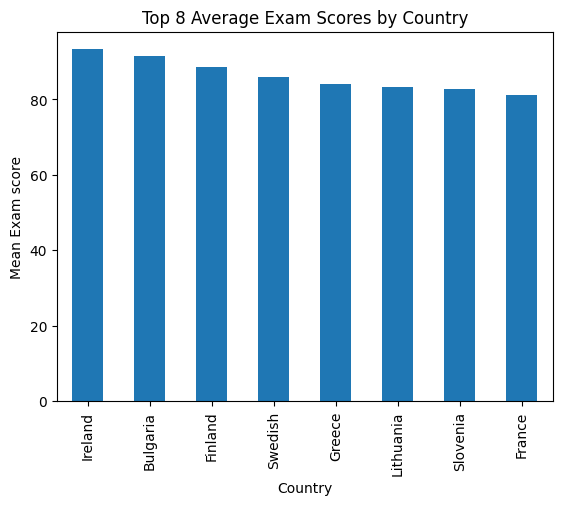

In [76]:
#getting mean exam score each country
data.groupby('Countries')['Exam score'].mean().sort_values(ascending=False).head(8).plot(kind='bar')
plt.ylabel('Mean Exam score')
plt.xlabel('Country')
plt.title('Top 8 Average Exam Scores by Country')
plt.show()

In [77]:
#getting top countries with lower mean exam score
data.groupby('Countries')['Exam score'].mean().sort_values(ascending=True).head(8)


Countries
Croatia           65.533333
Czech republic    72.192500
Portuguese        73.864286
Norway            74.770000
Hungary           76.640909
Austria           76.702308
Belgium           76.869231
Romania           77.770000
Name: Exam score, dtype: float64

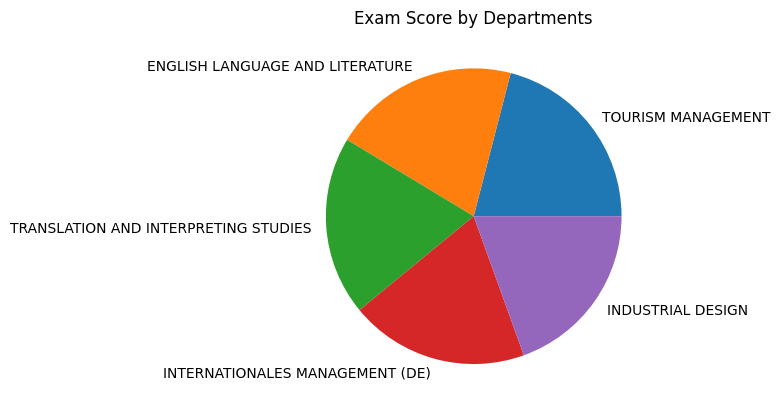

In [78]:
#Mean exam score by department
data.groupby('Departments')['Exam score'].mean().sort_values(ascending=False).head(5).plot(kind='pie')
plt.ylabel("")
plt.title('Exam Score by Departments')
plt.show()

In [79]:
#group Exam score by Countries and Grant
groupdata = data.groupby(['Countries', 'Grant'])['Exam score'].mean().reset_index()
groupdata[groupdata['Countries']=='Spain']

,Countries,Grant,Exam score
35,Spain,0,73.701538
36,Spain,1,85.328462


In [80]:
#define variables predictors and output
X = data[['Countries', 'Departments', 'Exam score']]
y = data['Grant']

In [81]:
#values unique
print(X['Departments'].unique())

#nro values unique
print('\n',X['Departments'].nunique())

['ENGLISH LANGUAGE AND LITERATURE' 'SOCIOLOGY' 'PSYCHOLOGY'
 'NUTRITION AND DIETETICS' 'POLITICAL SCIENCE AND INTERNATIONAL RELATIONS'
 'TRANSLATION AND INTERPRETING STUDIES' 'TOURISM MANAGEMENT'
 'ENGLISH LANGUAGE TEACHING' 'INTERNATIONAL TRADE AND BUSINESS'
 'GRAPHIC DESIGN' 'BUSINESS ADMINISTRATION' 'HISTORY'
 'COMPUTER ENGINEERING' 'LAW'
 'POLITICAL SCIENCE AND INTERNATIONAL RELATIONS (FRENCH)'
 'MECHANICAL ENGINEERING' 'E-COMMERCE MANAGEMENT' 'PHILOSOPHY'
 'INDUSTRIAL ENGINEERING' 'MANAGEMENT INFORMATION SYSTEMS' 'MATHEMATICS'
 'INFORMATION SYSTEMS AND TECHNOLOGIES' 'GENETICS AND BIOENGINEERING '
 'PUBLIC RELATIONS AND PUBLICITY' 'INTERIOR ARCHITECTURE' 'MEDICINE'
 'INTERNATIONALES MANAGEMENT (DE)' 'PHARMACY' 'INDUSTRIAL DESIGN'
 'PLASTIC ARTS AND PAINTING' 'GUIDANCE AND PSYCHOLOGICAL COUNSELING'
 'ECONOMICS' 'PHYSICS' 'RADIO TELEVISION AND CINEMA'
 'ELECTRICAL & ELECTRONICS ENGINEERING' 'BIOMEDICAL ENGINEERING'
 'PHYSIOTHERAPY AND REHABILITATION' 'ARCHITECTURE'
 'VISUAL COMMUNICA

In [82]:
label_encoder = preprocessing.LabelEncoder()

X['Countries'] = label_encoder.fit_transform(data['Countries'])

print(X)

     Countries                                    Departments  Exam score
0           13                ENGLISH LANGUAGE AND LITERATURE       98.50
1           13                                      SOCIOLOGY       97.10
2            9                                     PSYCHOLOGY       96.80
3            9                        NUTRITION AND DIETETICS       96.50
4           13                ENGLISH LANGUAGE AND LITERATURE       96.32
..         ...                                            ...         ...
336          6  POLITICAL SCIENCE AND INTERNATIONAL RELATIONS       62.13
337         16                              CIVIL ENGINEERING       61.63
338          1                          INTERNATIONAL FINANCE       59.93
339          6           ADVERTISING DESIGN AND COMMUNICATION       56.58
340          9                                       MEDICINE       51.40

[339 rows x 3 columns]


C:\Users\Usuario\AppData\Local\Temp\ipykernel_16324\729742174.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Countries'] = label_encoder.fit_transform(data['Countries'])


In [83]:
label_encoder.classes_

array(['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Czech republic',
       'Denmark', 'Dutch', 'Finland', 'France', 'German', 'Greece',
       'Hungary', 'Ireland', 'Italia', 'Lithuania', 'Norway', 'Poland',
       'Portuguese', 'Romania', 'Slovenia', 'Spain', 'Swedish'],
      dtype=object)

In [84]:
X['Departments'] = label_encoder.fit_transform(data['Departments'])
print(X)

     Countries  Departments  Exam score
0           13           12       98.50
1           13           48       97.10
2            9           44       96.80
3            9           35       96.50
4           13           12       96.32
..         ...          ...         ...
336          6           41       62.13
337         16            6       61.63
338          1           24       59.93
339          6            0       56.58
340          9           33       51.40

[339 rows x 3 columns]


C:\Users\Usuario\AppData\Local\Temp\ipykernel_16324\3308881944.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Departments'] = label_encoder.fit_transform(data['Departments'])


In [85]:
label_encoder.classes_

array(['ADVERTISING DESIGN AND COMMUNICATION',
       'AGRICULTURAL TRADE AND MANAGEMENT', 'ARCHITECTURE',
       'BIOMEDICAL ENGINEERING', 'BUSINESS ADMINISTRATION',
       'CHEMICAL ENGINEERING', 'CIVIL ENGINEERING',
       'COMPUTER ENGINEERING', 'E-COMMERCE MANAGEMENT', 'ECONOMICS',
       'ELECTRICAL & ELECTRONICS ENGINEERING',
       'ELEMENTARY MATHEMATICS EDUCATION',
       'ENGLISH LANGUAGE AND LITERATURE', 'ENGLISH LANGUAGE TEACHING',
       'FOOD ENGINEERING', 'GENETICS AND BIOENGINEERING ',
       'GRAPHIC DESIGN', 'GUIDANCE AND PSYCHOLOGICAL COUNSELING',
       'HISTORY', 'INDUSTRIAL DESIGN', 'INDUSTRIAL ENGINEERING',
       'INFORMATION SECURITY TECHNOLOGY',
       'INFORMATION SYSTEMS AND TECHNOLOGIES', 'INTERIOR ARCHITECTURE',
       'INTERNATIONAL FINANCE', 'INTERNATIONAL TRADE AND BUSINESS',
       'INTERNATIONALES MANAGEMENT (DE)', 'JOURNALISM', 'LAW',
       'LOGISTICS MANAGEMENT', 'MANAGEMENT INFORMATION SYSTEMS',
       'MATHEMATICS', 'MECHANICAL ENGINEERING', 'ME

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [87]:
#Testing model logistic regression
log_model = LogisticRegression()

#train model
log_model.fit(X_train, y_train.values.ravel())

#get predictions of model LR
log_model_predictions = log_model.predict(X_test)
print('predictions of model:\n', log_model_predictions, '\n')
#get metrics about this model
print('accurancy: \n',accuracy_score(y_test, log_model_predictions), '\n')


predictions of model:
 [1 0 1 0 0 1 1 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 1 0 0] 

accurancy: 
 0.8529411764705882 



In [88]:
#Testing model SVC
svm = SVC()

#params
param_grid_svc = {
    'C': [.01, .1, .5, 1], 'kernel': ['Linear', 'rbf', 'poly']
}

gridsvc = GridSearchCV(svm, param_grid_svc)

#train model
gridsvc.fit(X_train, y_train.values.ravel())


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5, 1],
                         'kernel': ['Linear', 'rbf', 'poly']})

In [89]:
#get best params
print(gridsvc.best_params_,'\n')

#get best estimator
print(gridsvc.best_estimator_.predict)

{'C': 0.5, 'kernel': 'poly'} 

<bound method BaseSVC.predict of SVC(C=0.5, kernel='poly')>


In [90]:
#get predictions of model SVC
svc_predictions = gridsvc.predict(X_test)
print('predictions of model:\n', svc_predictions, '\n')
#get metrics about this model
print('accurancy: \n',accuracy_score(y_test, svc_predictions), '\n')


predictions of model:
 [1 0 1 0 0 1 1 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 1 0 0] 

accurancy: 
 0.8529411764705882 



In [91]:
#Testing model RFC
rfc_model = RandomForestClassifier()
n_estimators= [32, 64, 128, 256]
max_features = [2, 3, 4]

#define params to model
param_grid_rfc = {
    'n_estimators': n_estimators,
    'max_features': max_features
}

#train model
grid_rfc = GridSearchCV(rfc_model, param_grid_rfc)
grid_rfc.fit(X_train, y_train.values.ravel())


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_features': [2, 3, 4],
                         'n_estimators': [32, 64, 128, 256]})

In [92]:
#get best params
print(grid_rfc.best_params_,'\n')

#get best estimator
print(grid_rfc.best_estimator_)

#get predictions of model RFC
rfc_predictions = grid_rfc.predict(X_test)
print('predictions of model:\n', rfc_predictions, '\n')
#get metrics about this model
print('accurancy: \n',accuracy_score(y_test, rfc_predictions), '\n')


{'max_features': 2, 'n_estimators': 32} 

RandomForestClassifier(max_features=2, n_estimators=32)
predictions of model:
 [1 0 1 0 0 1 1 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 1 1 0 1 1 0 1 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 0 0] 

accurancy: 
 0.8823529411764706 



In [93]:
# export model ml

if accuracy_score(y_test, rfc_predictions) > accuracy_score(
    y_test, svc_predictions
) and accuracy_score(y_test, rfc_predictions) > accuracy_score(
    y_test, log_model_predictions
):
    print("model rfc")
    joblib.dump(grid_rfc.best_estimator_, "model.pkl")
elif accuracy_score(y_test, svc_predictions) > accuracy_score(
    y_test, rfc_predictions
) and accuracy_score(y_test, svc_predictions) > accuracy_score(
    y_test, log_model_predictions
):
    print("model svc")
    joblib.dump(gridsvc.best_estimator_, "model.pkl")
else:
    print("model log_model")
    joblib.dump(log_model, "model.pkl")

model rfc


In [94]:
#columns of variable X

X.columns

Index(['Countries', 'Departments', 'Exam score'], dtype='object')

In [95]:
X

,Countries,Departments,Exam score
0,13,12,98.50
1,13,48,97.10
2,9,44,96.80
3,9,35,96.50
4,13,12,96.32
...,...,...,...
336,6,41,62.13
337,16,6,61.63
338,1,24,59.93
339,6,0,56.58
